<a href="https://colab.research.google.com/github/SolovevDR/NIR/blob/main/vectorize_and_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/NIR')



---
---
---



In [ ]:
import pandas as pd
import numpy as np
 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from keras.utils import np_utils
from sklearn.preprocessing import OneHotEncoder 

In [ ]:
my_df = pd.read_csv('DICT_FOR_LEARN.csv', header= 0, sep=';')

In [ ]:
my_df.columns

Index(['Unnamed: 0', 'ip', 'country', 'continent', 'timezone', 'datetime',
       'method', 'url_path', 'number_availability', 'http', 'status_code',
       'size_object', 'exit_system', 'os', 'browser', 'device', 'markup'],
      dtype='object')

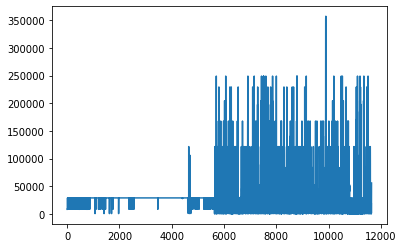

In [ ]:
my_df['size_object'].plot()

видно, что данные имеют, большой разброс. Требуют маштабирования. 

In [ ]:
from sklearn import preprocessing

x_array = np.array(my_df['size_object'])
normalized_arr = preprocessing.normalize([x_array])
normalized_arr = normalized_arr[0]

my_df['size_object'] = normalized_arr
print(my_df['size_object'].head())

0    0.001884
1    0.001884
2    0.001884
3    0.001884
4    0.001884
Name: size_object, dtype: float64


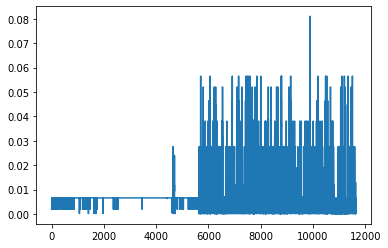

In [ ]:
my_df['size_object'].plot()

In [ ]:
test = my_df['country'].tolist()
test_encoded, test_categories = my_df['country'].factorize()
print(test_encoded)

[0 1 0 ... 6 6 6]


In [ ]:
from sklearn.pipeline import FeatureUnion

# Index(['Unnamed: 0', 'ip', 'country', 'continent', 'timezone', 'datetime',
#        'method', 'url_path', 'number_availability', 'http', 'status_code',
#        'size_object', 'exit_system', 'os', 'browser', 'device', 'markup'],
#       dtype='object')

vectorizer = CountVectorizer()
X1 = vectorizer.fit_transform(my_df['url_path']).toarray()

encoder = OneHotEncoder()

country_encoded, country_categories = my_df['country'].factorize()
contry_cat_lhot = encoder.fit_transform(country_encoded.reshape(-1 ,1))
X2 = contry_cat_lhot.toarray()

continent_encoded, continent_categories = my_df['continent'].factorize()
continent_cat_lhot = encoder.fit_transform(continent_encoded.reshape(-1 ,1))
X3 = continent_cat_lhot.toarray()

method_encoded, method_categories = my_df['method'].factorize()
method_cat_lhot = encoder.fit_transform(method_encoded.reshape(-1 ,1))
X4 = method_cat_lhot.toarray()

http_encoded, http_categories = my_df['http'].factorize()
http_cat_lhot = encoder.fit_transform(http_encoded.reshape(-1 ,1))
X5 = http_cat_lhot.toarray()

exit_system_encoded, exit_system_categories = my_df['exit_system'].factorize()
exit_system_cat_lhot = encoder.fit_transform(exit_system_encoded.reshape(-1 ,1))
X6 = exit_system_cat_lhot.toarray()

os_encoded, os_categories = my_df['os'].factorize()
os_cat_lhot = encoder.fit_transform(os_encoded.reshape(-1 ,1))
X7 = os_cat_lhot.toarray()

browser_encoded, browser_categories = my_df['browser'].factorize()
browser_cat_lhot = encoder.fit_transform(browser_encoded.reshape(-1 ,1))
X8 = browser_cat_lhot.toarray()

device_encoded, device_categories = my_df['device'].factorize()
device_cat_lhot = encoder.fit_transform(device_encoded.reshape(-1 ,1))
X9 = device_cat_lhot.toarray()

markup_encoded, markup_categories = my_df['markup'].factorize()
markup_cat_lhot = encoder.fit_transform(markup_encoded.reshape(-1 ,1))
y = markup_cat_lhot.toarray()


In [ ]:

my_df = my_df.join([pd.DataFrame(X1, columns=(f'url_path_{i}' for i in range(X1.shape[1])))])
my_df = my_df.join([pd.DataFrame(X2, columns=(f'country_{i}' for i in range(X2.shape[1])))])
my_df = my_df.join([pd.DataFrame(X3, columns=(f'continent_{i}' for i in range(X3.shape[1])))])
my_df = my_df.join([pd.DataFrame(X4, columns=(f'method_{i}' for i in range(X4.shape[1])))])
my_df = my_df.join([pd.DataFrame(X5, columns=(f'http_{i}' for i in range(X5.shape[1])))])
my_df = my_df.join([pd.DataFrame(X6, columns=(f'exit_system_{i}' for i in range(X6.shape[1])))])
my_df = my_df.join([pd.DataFrame(X7, columns=(f'os_{i}' for i in range(X7.shape[1])))])
my_df = my_df.join([pd.DataFrame(X8, columns=(f'browser_{i}' for i in range(X8.shape[1])))])
my_df = my_df.join([pd.DataFrame(X9, columns=(f'device_{i}' for i in range(X9.shape[1])))])
my_df = my_df.join([pd.DataFrame(y, columns=(f'markup_{i}' for i in range(y.shape[1])))])

print(my_df.head)

<bound method NDFrame.head of        Unnamed: 0              ip country  ... device_111 markup_0 markup_1
0               0  155.94.228.201      US  ...        0.0      1.0      0.0
1               1  136.243.34.253      DE  ...        0.0      1.0      0.0
2               2  155.94.228.201      US  ...        0.0      1.0      0.0
3               3  136.243.34.253      DE  ...        0.0      1.0      0.0
4               4  136.243.34.253      DE  ...        0.0      1.0      0.0
...           ...             ...     ...  ...        ...      ...      ...
11638       11638   94.41.137.171      RU  ...        0.0      0.0      1.0
11639       11639   94.41.137.171      RU  ...        0.0      0.0      1.0
11640       11640   94.41.137.171      RU  ...        0.0      0.0      1.0
11641       11641   94.41.137.171      RU  ...        0.0      0.0      1.0
11642       11642   94.41.137.171      RU  ...        0.0      0.0      1.0

[11643 rows x 460 columns]>


In [ ]:
del my_df['ip']
del my_df['timezone']
del my_df['country']
del my_df['continent']
del my_df['method']
del my_df['http']
del my_df['exit_system']
del my_df['os']
del my_df['browser']
del my_df['device']
del my_df['datetime']
del my_df['url_path']
del my_df['markup']

In [ ]:
my_df.columns

Index(['Unnamed: 0', 'number_availability', 'status_code', 'size_object',
       'url_path_0', 'url_path_1', 'url_path_2', 'url_path_3', 'url_path_4',
       'url_path_5',
       ...
       'device_104', 'device_105', 'device_106', 'device_107', 'device_108',
       'device_109', 'device_110', 'device_111', 'markup_0', 'markup_1'],
      dtype='object', length=447)

In [ ]:
from sklearn.model_selection import train_test_split
x = my_df.iloc[:,0:445]
y = my_df.iloc[:,445:]
x = x.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
print(y_test)

       markup_0  markup_1
5135        1.0       0.0
850         1.0       0.0
9617        0.0       1.0
4791        1.0       0.0
9407        0.0       1.0
...         ...       ...
1023        1.0       0.0
3298        1.0       0.0
10237       0.0       1.0
6834        0.0       1.0
59          1.0       0.0

[3493 rows x 2 columns]




---



---



---

### Тут плохо подобраны модели

### Пока не нужно на это смотреть

In [ ]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# 1. создаем модель - объявляем ее объектом класса Sequential
model = Sequential()
# 2. добавляем выходной слой
model.add(Dense( units=2, input_dim=445, activation='softmax'))
# 3. компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
# вывод информации об архитектуре модели
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 892       
                                                                 
Total params: 892
Trainable params: 892
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
H = model.fit(X_train, y_train, validation_split=0.1, epochs=100)

Epoch 1/100
230/230 [==============================] - 1s 3ms/step - loss: 53261.1094 - accuracy: 0.5801 - val_loss: 37395.4844 - val_accuracy: 0.5926
Epoch 2/100
230/230 [==============================] - 0s 1ms/step - loss: 43149.2461 - accuracy: 0.6275 - val_loss: 49492.6680 - val_accuracy: 0.6172
Epoch 3/100
230/230 [==============================] - 0s 2ms/step - loss: 29172.9023 - accuracy: 0.7166 - val_loss: 1042.3174 - val_accuracy: 0.8908
Epoch 4/100
230/230 [==============================] - 0s 2ms/step - loss: 28169.1270 - accuracy: 0.7196 - val_loss: 10472.2383 - val_accuracy: 0.7669
Epoch 5/100
230/230 [==============================] - 0s 2ms/step - loss: 18250.9473 - accuracy: 0.7787 - val_loss: 11168.2100 - val_accuracy: 0.7718
Epoch 6/100
230/230 [==============================] - 0s 2ms/step - loss: 13755.1250 - accuracy: 0.8176 - val_loss: 5460.9429 - val_accuracy: 0.8233
Epoch 7/100
230/230 [==============================] - 0s 1ms/step - loss: 12670.1016 - accuracy

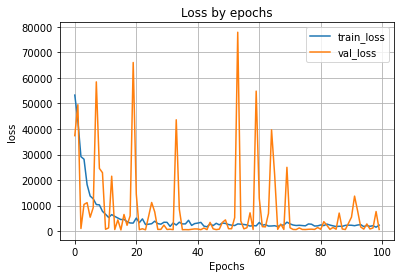

In [ ]:
import matplotlib.pyplot as plt

# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')
plt.show()

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

110/110 [==============================] - 0s 1ms/step - loss: 551.1436 - accuracy: 0.9760
Loss on test data: 551.1436157226562
Accuracy on test data: 0.9759519100189209
